# Udacity Capstone Project

## EEG signal Based Eye State Classification

### Loading the files in Google colab

In [0]:
# You can skip this step if you are training on local System

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fid = drive.ListFile({'q':"title='EEG Eye State.txt'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('EEG Eye State.txt')

In [0]:
# Loading the dataset

fname = "EEG Eye State.txt"
with open(fname) as f:
    content = f.readlines()

content = [x.strip() for x in content] 
content = [x.split(",") for x in content]

In [0]:
# Converting list to numpy array

import numpy as np

content = np.array(content, dtype = 'float32')

In [0]:
# Shuffling the dataset

import random
random.shuffle(content)

In [0]:
# Storing results of algorithms
score_p = []

### Creating X and Y

In [0]:
x = content[:, :-1]
y = np.array(content[:, -1], dtype = 'int32')

In [128]:
x[0]

array([4329.23, 4009.23, 4289.23, 4148.21, 4350.26, 4586.15, 4096.92,
       4641.03, 4222.05, 4238.46, 4211.28, 4280.51, 4635.9 , 4393.85],
      dtype=float32)

In [129]:
y[0]

0

# Statistical Features approach

## Data Preparation

In [0]:
import pandas as pd
import numpy as np
import scipy

In [0]:
X_columns = ['mean', 'standard deviation', 'kurt', 'skewness']
Y_columns = ['label']

In [0]:
X = pd.DataFrame(columns = X_columns)
Y = pd.DataFrame(columns = Y_columns)

In [0]:
for i in range(len(x)):
  X.loc[i] = np.array([np.mean(x[i]), np.std(x[i]), scipy.stats.kurtosis(x[i]), scipy.stats.skew(x[i])])
  Y.loc[i] = y[i]

In [134]:
X.head(n=20)

,mean,standard deviation,kurt,skewness
0,4316.593750,186.395279,-0.686817,0.439234
1,4312.748535,186.797379,-0.673855,0.459162
2,4312.748535,186.797379,-0.673855,0.459162
3,4312.748535,186.797379,-0.673855,0.459162
4,4316.189941,184.204300,-0.716226,0.414606
5,4312.160645,184.608978,-0.693921,0.443294
6,4312.748535,186.797379,-0.673855,0.459162
7,4316.227051,183.612762,-0.696899,0.422589
8,4312.160645,184.608978,-0.693921,0.443294
9,4307.143555,183.993057,-0.686661,0.435931


In [135]:
Y.head()

,label
0,0
1,0
2,0
3,0
4,0


In [0]:
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)



## Training on SVM

In [137]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train1, y_train1) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
predicted = clf.predict(X_test1)

In [0]:
from sklearn import metrics

### Performance

In [181]:
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test1, predicted), metrics.precision_score(y_test1, predicted),metrics.recall_score(y_test1, predicted),metrics.f1_score(y_test1, predicted)))

score_p.append([metrics.accuracy_score(y_test1, predicted), metrics.precision_score(y_test1, predicted),metrics.recall_score(y_test1, predicted),metrics.f1_score(y_test1, predicted)]) 


Accuracy = 0.6989319092122831
Precision = 0.7059190031152648
Recall = 0.7248880358285349
F1 Score = 0.7152777777777777


## Training on Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [142]:
clf_D = LogisticRegression()
clf_D.fit(X_train1, y_train1)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
predict = clf_D.predict(X_test1)


### Performance

In [182]:
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test1, predict), metrics.precision_score(y_test1, predict),metrics.recall_score(y_test1, predict),metrics.f1_score(y_test1, predict)))
score_p.append([metrics.accuracy_score(y_test1, predict), metrics.precision_score(y_test1, predict),metrics.recall_score(y_test1, predict),metrics.f1_score(y_test1, predict)])

Accuracy = 0.5240320427236315
Precision = 0.5404607206142942
Recall = 0.5854126679462572
F1 Score = 0.5620393120393121


## Second Approach Directly use 14 values of EEG data and use it for prediction 

### Normalization of data

Normalization of data is required before using it on Nueral Networks

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [0]:
scaler.fit(x)
x_new = scaler.transform(x)

In [0]:
data_mean = x.mean()
data_std = x.std()
x = (x - data_mean)/data_std

In [0]:
(x_train, x_test) = x[:11000], x[11000:]
(y_train, y_test) = y[:11000], y[11000:]

## Training on Neural Networks

### Creating Model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [150]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (x.shape[1], )))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 512)               7680      
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 513       
Total params: 8,193
Trainable params: 8,193
Non-trainable params: 0
_________________________________________________________________


In [151]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 512)               7680      
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 513       
Total params: 8,193
Trainable params: 8,193
Non-trainable params: 0
_________________________________________________________________


### Training

In [152]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'MLP.weights.best.hdf5', verbose = 1, save_best_only = True)
hist = model.fit(x_train, y_train, epochs = 100, batch_size=256, validation_split = 0.1, callbacks = [checkpointer], verbose = 2, shuffle = True)

Train on 9900 samples, validate on 1100 samples
Epoch 1/100
 - 1s - loss: 0.6908 - acc: 0.5247 - val_loss: 0.6909 - val_acc: 0.5255

Epoch 00001: val_loss improved from inf to 0.69085, saving model to MLP.weights.best.hdf5
Epoch 2/100
 - 0s - loss: 0.6891 - acc: 0.5276 - val_loss: 0.6900 - val_acc: 0.5400

Epoch 00002: val_loss improved from 0.69085 to 0.68995, saving model to MLP.weights.best.hdf5
Epoch 3/100
 - 0s - loss: 0.6867 - acc: 0.5356 - val_loss: 0.6896 - val_acc: 0.5500

Epoch 00003: val_loss improved from 0.68995 to 0.68959, saving model to MLP.weights.best.hdf5
Epoch 4/100
 - 0s - loss: 0.6850 - acc: 0.5458 - val_loss: 0.6877 - val_acc: 0.5427

Epoch 00004: val_loss improved from 0.68959 to 0.68769, saving model to MLP.weights.best.hdf5
Epoch 5/100
 - 0s - loss: 0.6816 - acc: 0.5536 - val_loss: 0.6866 - val_acc: 0.5482

Epoch 00005: val_loss improved from 0.68769 to 0.68658, saving model to MLP.weights.best.hdf5
Epoch 6/100
 - 0s - loss: 0.6783 - acc: 0.5560 - val_loss: 0.


Epoch 00076: val_loss improved from 0.66219 to 0.66156, saving model to MLP.weights.best.hdf5
Epoch 77/100
 - 0s - loss: 0.5680 - acc: 0.7068 - val_loss: 0.6634 - val_acc: 0.5864

Epoch 00077: val_loss did not improve from 0.66156
Epoch 78/100
 - 0s - loss: 0.5661 - acc: 0.7090 - val_loss: 0.6634 - val_acc: 0.5873

Epoch 00078: val_loss did not improve from 0.66156
Epoch 79/100
 - 0s - loss: 0.5656 - acc: 0.7166 - val_loss: 0.6625 - val_acc: 0.5836

Epoch 00079: val_loss did not improve from 0.66156
Epoch 80/100
 - 0s - loss: 0.5633 - acc: 0.7212 - val_loss: 0.6611 - val_acc: 0.5927

Epoch 00080: val_loss improved from 0.66156 to 0.66105, saving model to MLP.weights.best.hdf5
Epoch 81/100
 - 0s - loss: 0.5649 - acc: 0.7073 - val_loss: 0.6613 - val_acc: 0.5955

Epoch 00081: val_loss did not improve from 0.66105
Epoch 82/100
 - 0s - loss: 0.5636 - acc: 0.7161 - val_loss: 0.6610 - val_acc: 0.5936

Epoch 00082: val_loss improved from 0.66105 to 0.66103, saving model to MLP.weights.best.hd

In [153]:
score = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy: ", score[1])

3980/3980 [==============================] - 0s 69us/step
Accuracy:  0.5806532662717542


In [0]:
predict2 = [1 if a>0.5 else 0 for a in model.predict(x_test)] 

### Performance

In [155]:
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test, predict2), metrics.precision_score(y_test, predict2),metrics.recall_score(y_test, predict2),metrics.f1_score(y_test, predict2)))
#score_p.append([metrics.accuracy_score(y_test, predict2), metrics.precision_score(y_test, predict2),metrics.recall_score(y_test, predict2),metrics.f1_score(y_test, predict2)])

Accuracy = 0.5806532663316583
Precision = 0.5720164609053497
Recall = 0.6884596334819217
F1 Score = 0.624859518993032


# Improved Neural Network (Tuning Parameters)

In [156]:
model2 = Sequential()
model2.add(Dense(1000, activation = 'relu', input_shape = (x.shape[1], )))
model2.add(Dropout(0.2))
model2.add(Dense(1000, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1000, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation = 'sigmoid'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 1000)              15000     
_________________________________________________________________
dropout_12 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_14 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 1001      
Total para

In [157]:
model2.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 1000)              15000     
_________________________________________________________________
dropout_12 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_14 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 1001      
Total para

In [186]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'MLP_new.weights.best.hdf5', verbose = 1, save_best_only = True)
hist1 = model2.fit( x_train, y_train, epochs = 200, batch_size=512, validation_split = 0.1, callbacks = [checkpointer], verbose = 2, shuffle = True )

Train on 9900 samples, validate on 1100 samples
Epoch 1/200
 - 0s - loss: 0.1822 - acc: 0.9248 - val_loss: 0.6104 - val_acc: 0.8136

Epoch 00001: val_loss improved from inf to 0.61037, saving model to MLP_new.weights.best.hdf5
Epoch 2/200
 - 0s - loss: 0.1627 - acc: 0.9368 - val_loss: 0.8544 - val_acc: 0.7718

Epoch 00002: val_loss did not improve from 0.61037
Epoch 3/200
 - 0s - loss: 0.1439 - acc: 0.9425 - val_loss: 0.8382 - val_acc: 0.7927

Epoch 00003: val_loss did not improve from 0.61037
Epoch 4/200
 - 0s - loss: 0.1674 - acc: 0.9303 - val_loss: 0.6309 - val_acc: 0.7709

Epoch 00004: val_loss did not improve from 0.61037
Epoch 5/200
 - 0s - loss: 0.1714 - acc: 0.9280 - val_loss: 0.6648 - val_acc: 0.7755

Epoch 00005: val_loss did not improve from 0.61037
Epoch 6/200
 - 0s - loss: 0.1515 - acc: 0.9382 - val_loss: 0.8148 - val_acc: 0.7873

Epoch 00006: val_loss did not improve from 0.61037
Epoch 7/200
 - 0s - loss: 0.1613 - acc: 0.9328 - val_loss: 0.7230 - val_acc: 0.8127

Epoch 00


Epoch 00079: val_loss did not improve from 0.51165
Epoch 80/200
 - 0s - loss: 0.1269 - acc: 0.9485 - val_loss: 0.6173 - val_acc: 0.8127

Epoch 00080: val_loss did not improve from 0.51165
Epoch 81/200
 - 0s - loss: 0.1248 - acc: 0.9506 - val_loss: 0.6928 - val_acc: 0.8073

Epoch 00081: val_loss did not improve from 0.51165
Epoch 82/200
 - 0s - loss: 0.1389 - acc: 0.9423 - val_loss: 0.6808 - val_acc: 0.8145

Epoch 00082: val_loss did not improve from 0.51165
Epoch 83/200
 - 0s - loss: 0.1250 - acc: 0.9503 - val_loss: 0.6263 - val_acc: 0.8336

Epoch 00083: val_loss did not improve from 0.51165
Epoch 84/200
 - 0s - loss: 0.1236 - acc: 0.9525 - val_loss: 0.5383 - val_acc: 0.8064

Epoch 00084: val_loss did not improve from 0.51165
Epoch 85/200
 - 0s - loss: 0.1411 - acc: 0.9433 - val_loss: 0.6813 - val_acc: 0.8109

Epoch 00085: val_loss did not improve from 0.51165
Epoch 86/200
 - 0s - loss: 0.1508 - acc: 0.9397 - val_loss: 0.5609 - val_acc: 0.8009

Epoch 00086: val_loss did not improve fr

 - 0s - loss: 0.1099 - acc: 0.9554 - val_loss: 0.5980 - val_acc: 0.8364

Epoch 00159: val_loss did not improve from 0.49123
Epoch 160/200
 - 0s - loss: 0.1271 - acc: 0.9498 - val_loss: 0.5861 - val_acc: 0.8164

Epoch 00160: val_loss did not improve from 0.49123
Epoch 161/200
 - 0s - loss: 0.1200 - acc: 0.9518 - val_loss: 0.5700 - val_acc: 0.8318

Epoch 00161: val_loss did not improve from 0.49123
Epoch 162/200
 - 0s - loss: 0.1234 - acc: 0.9498 - val_loss: 0.6797 - val_acc: 0.8173

Epoch 00162: val_loss did not improve from 0.49123
Epoch 163/200
 - 0s - loss: 0.1145 - acc: 0.9549 - val_loss: 0.5748 - val_acc: 0.8155

Epoch 00163: val_loss did not improve from 0.49123
Epoch 164/200
 - 0s - loss: 0.1259 - acc: 0.9477 - val_loss: 0.5544 - val_acc: 0.8400

Epoch 00164: val_loss did not improve from 0.49123
Epoch 165/200
 - 0s - loss: 0.1463 - acc: 0.9418 - val_loss: 0.6388 - val_acc: 0.8018

Epoch 00165: val_loss did not improve from 0.49123
Epoch 166/200
 - 0s - loss: 0.1426 - acc: 0.9420

In [161]:
score = model2.evaluate(x_test, y_test, verbose=1)
print("Accuracy: ", score[1])

3980/3980 [==============================] - 0s 77us/step
Accuracy:  0.7557788944124576


In [0]:
predict3 = [1 if a>=0.5 else 0 for a in model2.predict(x_test)] 

In [183]:
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test, predict3), metrics.precision_score(y_test, predict3),metrics.recall_score(y_test, predict3),metrics.f1_score(y_test, predict3)))
score_p.append([metrics.accuracy_score(y_test, predict3), metrics.precision_score(y_test, predict3),metrics.recall_score(y_test, predict3),metrics.f1_score(y_test, predict3)])

Accuracy = 0.7557788944723618
Precision = 0.7142857142857143
Recall = 0.8642892521050025
F1 Score = 0.7821604661586732


In [0]:
import matplotlib.pyplot as plt

# Training on  LSTM

### Creating 3D array dataset

In [0]:
X_train = np.asarray(np.reshape(x_train, (x_train.shape[0], 14, 1)))
X_test = np.asarray(np.reshape(x_test, (x_test.shape[0], 14, 1)))

In [0]:
from keras.layers import Dense, Dropout, CuDNNLSTM, Embedding, LSTM
from keras.models import Sequential

In [0]:
model3 = Sequential()
model3.add(LSTM(256,input_shape=(14, 1), return_sequences=True))
model3.add(LSTM(256))
model3.add(Dense(1, activation='sigmoid'))

In [169]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 14, 256)           264192    
_________________________________________________________________
lstm_8 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 257       
Total params: 789,761
Trainable params: 789,761
Non-trainable params: 0
_________________________________________________________________


In [170]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'LSTM.weights.best.hdf5', verbose = 1, save_best_only = True)
hist = model3.fit(X_train, y_train, epochs = 100, batch_size=256, validation_split = 0.1, callbacks = [checkpointer], verbose = 2, shuffle = True)

Train on 9900 samples, validate on 1100 samples
Epoch 1/100
 - 4s - loss: 0.6925 - acc: 0.5182 - val_loss: 0.6918 - val_acc: 0.5255

Epoch 00001: val_loss improved from inf to 0.69181, saving model to LSTM.weights.best.hdf5
Epoch 2/100
 - 3s - loss: 0.6914 - acc: 0.5245 - val_loss: 0.6910 - val_acc: 0.5255

Epoch 00002: val_loss improved from 0.69181 to 0.69103, saving model to LSTM.weights.best.hdf5
Epoch 3/100
 - 3s - loss: 0.6887 - acc: 0.5283 - val_loss: 0.6900 - val_acc: 0.5300

Epoch 00003: val_loss improved from 0.69103 to 0.68997, saving model to LSTM.weights.best.hdf5
Epoch 4/100
 - 3s - loss: 0.6791 - acc: 0.5585 - val_loss: 0.6790 - val_acc: 0.5609

Epoch 00004: val_loss improved from 0.68997 to 0.67901, saving model to LSTM.weights.best.hdf5
Epoch 5/100
 - 3s - loss: 0.6741 - acc: 0.5611 - val_loss: 0.6844 - val_acc: 0.5518

Epoch 00005: val_loss did not improve from 0.67901
Epoch 6/100
 - 3s - loss: 0.6728 - acc: 0.5595 - val_loss: 0.6815 - val_acc: 0.5682

Epoch 00006: va

 - 3s - loss: 0.4350 - acc: 0.7932 - val_loss: 0.8118 - val_acc: 0.5864

Epoch 00078: val_loss did not improve from 0.65373
Epoch 79/100
 - 3s - loss: 0.4258 - acc: 0.7959 - val_loss: 0.7010 - val_acc: 0.6382

Epoch 00079: val_loss did not improve from 0.65373
Epoch 80/100
 - 3s - loss: 0.4453 - acc: 0.7832 - val_loss: 0.7750 - val_acc: 0.6245

Epoch 00080: val_loss did not improve from 0.65373
Epoch 81/100
 - 3s - loss: 0.4353 - acc: 0.7870 - val_loss: 0.6648 - val_acc: 0.6336

Epoch 00081: val_loss did not improve from 0.65373
Epoch 82/100
 - 3s - loss: 0.4265 - acc: 0.7961 - val_loss: 0.6661 - val_acc: 0.6373

Epoch 00082: val_loss did not improve from 0.65373
Epoch 83/100
 - 3s - loss: 0.4023 - acc: 0.8111 - val_loss: 0.7188 - val_acc: 0.6327

Epoch 00083: val_loss did not improve from 0.65373
Epoch 84/100
 - 3s - loss: 0.4288 - acc: 0.7927 - val_loss: 0.7236 - val_acc: 0.6218

Epoch 00084: val_loss did not improve from 0.65373
Epoch 85/100
 - 3s - loss: 0.3921 - acc: 0.8166 - val_

In [171]:
score = model3.evaluate(X_test, y_test, verbose=1)
print("Accuracy: ", score[1])

3980/3980 [==============================] - 2s 619us/step
Accuracy:  0.6753768843622064


In [0]:
predict4 =  [1 if a>0.5 else 0 for a in model3.predict(X_test)]

### Performance

In [173]:
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test, predict4), metrics.precision_score(y_test, predict4),metrics.recall_score(y_test, predict4),metrics.f1_score(y_test, predict4)))


Accuracy = 0.6753768844221105
Precision = 0.6686774941995359
Recall = 0.7137196631996038
F1 Score = 0.6904647819837088


# Improved LSTM (Tuning Parameter)

In [174]:
model4 = Sequential()
model4.add(CuDNNLSTM(units=512, input_shape=(14, 1), return_sequences=True))
model4.add(CuDNNLSTM(units=512))
model4.add(Dense(1, activation='sigmoid'))
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_8 (CuDNNLSTM)     (None, 14, 512)           1054720   
_________________________________________________________________
cu_dnnlstm_9 (CuDNNLSTM)     (None, 512)               2101248   
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 513       
Total params: 3,156,481
Trainable params: 3,156,481
Non-trainable params: 0
_________________________________________________________________


In [175]:
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_8 (CuDNNLSTM)     (None, 14, 512)           1054720   
_________________________________________________________________
cu_dnnlstm_9 (CuDNNLSTM)     (None, 512)               2101248   
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 513       
Total params: 3,156,481
Trainable params: 3,156,481
Non-trainable params: 0
_________________________________________________________________


In [176]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'LSTM_new.weights.best.hdf5', verbose = 1, save_best_only = True)
hist = model4.fit(X_train, y_train, epochs = 300, batch_size= 512, validation_split = 0.1, callbacks = [checkpointer], verbose = 2, shuffle = True)

Train on 9900 samples, validate on 1100 samples
Epoch 1/300
 - 3s - loss: 0.6922 - acc: 0.5243 - val_loss: 0.6918 - val_acc: 0.5255

Epoch 00001: val_loss improved from inf to 0.69181, saving model to LSTM_new.weights.best.hdf5
Epoch 2/300
 - 2s - loss: 0.6918 - acc: 0.5245 - val_loss: 0.6917 - val_acc: 0.5255

Epoch 00002: val_loss improved from 0.69181 to 0.69171, saving model to LSTM_new.weights.best.hdf5
Epoch 3/300
 - 2s - loss: 0.6914 - acc: 0.5209 - val_loss: 0.6906 - val_acc: 0.5255

Epoch 00003: val_loss improved from 0.69171 to 0.69059, saving model to LSTM_new.weights.best.hdf5
Epoch 4/300
 - 2s - loss: 0.6888 - acc: 0.5301 - val_loss: 0.6900 - val_acc: 0.5027

Epoch 00004: val_loss improved from 0.69059 to 0.69002, saving model to LSTM_new.weights.best.hdf5
Epoch 5/300
 - 2s - loss: 0.6882 - acc: 0.5481 - val_loss: 0.6892 - val_acc: 0.5418

Epoch 00005: val_loss improved from 0.69002 to 0.68917, saving model to LSTM_new.weights.best.hdf5
Epoch 6/300
 - 2s - loss: 0.6879 - a


Epoch 00077: val_loss did not improve from 0.66119
Epoch 78/300
 - 2s - loss: 0.6419 - acc: 0.6049 - val_loss: 0.6731 - val_acc: 0.5691

Epoch 00078: val_loss did not improve from 0.66119
Epoch 79/300
 - 2s - loss: 0.6323 - acc: 0.6231 - val_loss: 0.7359 - val_acc: 0.5227

Epoch 00079: val_loss did not improve from 0.66119
Epoch 80/300
 - 2s - loss: 0.6425 - acc: 0.6081 - val_loss: 0.6857 - val_acc: 0.5191

Epoch 00080: val_loss did not improve from 0.66119
Epoch 81/300
 - 2s - loss: 0.6495 - acc: 0.6072 - val_loss: 0.6844 - val_acc: 0.5555

Epoch 00081: val_loss did not improve from 0.66119
Epoch 82/300
 - 2s - loss: 0.6998 - acc: 0.5766 - val_loss: 1.2323 - val_acc: 0.4745

Epoch 00082: val_loss did not improve from 0.66119
Epoch 83/300
 - 2s - loss: 0.7361 - acc: 0.5171 - val_loss: 0.6917 - val_acc: 0.5164

Epoch 00083: val_loss did not improve from 0.66119
Epoch 84/300
 - 2s - loss: 0.6880 - acc: 0.5371 - val_loss: 0.6943 - val_acc: 0.4918

Epoch 00084: val_loss did not improve fr

 - 2s - loss: 0.5458 - acc: 0.7078 - val_loss: 0.7380 - val_acc: 0.5409

Epoch 00157: val_loss did not improve from 0.65158
Epoch 158/300
 - 2s - loss: 0.6747 - acc: 0.5649 - val_loss: 0.6723 - val_acc: 0.5482

Epoch 00158: val_loss did not improve from 0.65158
Epoch 159/300
 - 2s - loss: 0.6485 - acc: 0.6194 - val_loss: 0.6882 - val_acc: 0.5336

Epoch 00159: val_loss did not improve from 0.65158
Epoch 160/300
 - 2s - loss: 0.6935 - acc: 0.5443 - val_loss: 0.6803 - val_acc: 0.5800

Epoch 00160: val_loss did not improve from 0.65158
Epoch 161/300
 - 2s - loss: 0.6690 - acc: 0.6026 - val_loss: 0.6806 - val_acc: 0.5455

Epoch 00161: val_loss did not improve from 0.65158
Epoch 162/300
 - 2s - loss: 0.6645 - acc: 0.5895 - val_loss: 0.6784 - val_acc: 0.5618

Epoch 00162: val_loss did not improve from 0.65158
Epoch 163/300
 - 2s - loss: 0.6528 - acc: 0.6062 - val_loss: 0.6656 - val_acc: 0.5800

Epoch 00163: val_loss did not improve from 0.65158
Epoch 164/300
 - 2s - loss: 0.6382 - acc: 0.6103

 - 2s - loss: 0.3976 - acc: 0.8073 - val_loss: 0.6927 - val_acc: 0.6491

Epoch 00236: val_loss did not improve from 0.59696
Epoch 237/300
 - 2s - loss: 0.4215 - acc: 0.7894 - val_loss: 0.6716 - val_acc: 0.6273

Epoch 00237: val_loss did not improve from 0.59696
Epoch 238/300
 - 2s - loss: 0.4548 - acc: 0.7727 - val_loss: 0.7001 - val_acc: 0.6327

Epoch 00238: val_loss did not improve from 0.59696
Epoch 239/300
 - 2s - loss: 0.4452 - acc: 0.7881 - val_loss: 0.6165 - val_acc: 0.6536

Epoch 00239: val_loss did not improve from 0.59696
Epoch 240/300
 - 2s - loss: 0.3833 - acc: 0.8159 - val_loss: 0.5975 - val_acc: 0.6982

Epoch 00240: val_loss did not improve from 0.59696
Epoch 241/300
 - 2s - loss: 0.3884 - acc: 0.8205 - val_loss: 0.6234 - val_acc: 0.6436

Epoch 00241: val_loss did not improve from 0.59696
Epoch 242/300
 - 2s - loss: 0.3756 - acc: 0.8222 - val_loss: 0.5671 - val_acc: 0.7209

Epoch 00242: val_loss improved from 0.59696 to 0.56707, saving model to LSTM_new.weights.best.hdf5


In [177]:
score = model4.evaluate(X_test, y_test, verbose=1)
print("Accuracy: ", score[1])

3980/3980 [==============================] - 1s 256us/step
Accuracy:  0.728140703577492


In [0]:
predict5 =  [1 if a>0.5 else 0 for a in model4.predict(X_test)]

In [184]:
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test, predict5), metrics.precision_score(y_test, predict5),metrics.recall_score(y_test, predict5),metrics.f1_score(y_test, predict5)))
score_p.append([metrics.accuracy_score(y_test, predict5), metrics.precision_score(y_test, predict5),metrics.recall_score(y_test, predict5),metrics.f1_score(y_test, predict5)])

Accuracy = 0.728140703517588
Precision = 0.6999573196756296
Recall = 0.8122833085685983
F1 Score = 0.7519486474094451


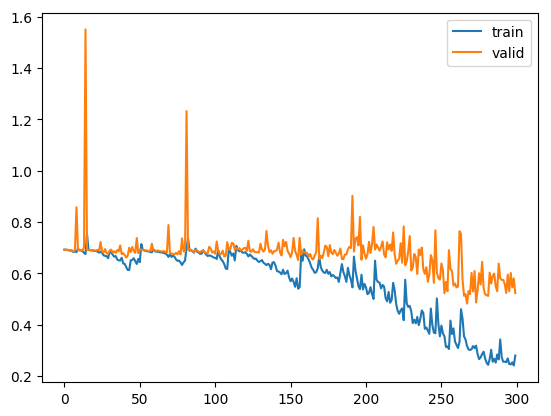

In [190]:
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label = 'valid')
plt.legend()
plt.show()

# Conclusion

## Ploting the results

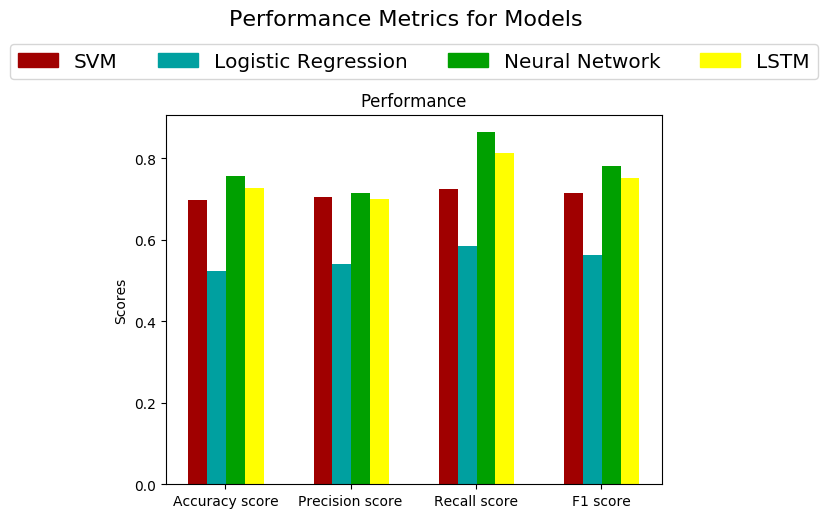

In [185]:
#For plotting the results code is copied from Udacity Finding Donors for Charity ML Project


import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

objects = ['Accuracy score', 'Precision score', 'Recall score', 'F1 score']
w =  0.15
y_pos = np.arange(len(objects))

color = ['#A00000','#00A0A0','#00A000', '#FFFF00']
s = 0
for i in range(len(score_p)):
    plt.bar(y_pos+s, score_p[i], color = color[i], width = w )
    s += w
    
plt.xticks(y_pos + 0.22, objects)
plt.ylabel('Scores')
plt.title('Performance')
plt.suptitle("Performance Metrics for Models", fontsize = 16, y = 1.10)

p = ['SVM',  'Logistic Regression', 'Neural Network', 'LSTM']

patches = []

for k in range(len(p)):
    patches.append(mpatches.Patch(color = color[k], label = p[k]))

plt.legend(handles = patches, bbox_to_anchor = (0.5, 1.19),loc = 'upper center', borderaxespad = 0., ncol = 4, fontsize = 'x-large')

plt.show();